In [1]:
from import_src import import_src
import_src()

Append /home/ubuntu/tungpth/MLOpsVN/src to sys.path


In [2]:
%cd ../..
%pwd
import os
os.getcwd()

/home/ubuntu/tungpth/MLOpsVN


'/home/ubuntu/tungpth/MLOpsVN'

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json
from plotly import express as px
from sklearn.preprocessing import LabelEncoder
import mlflow
import time
import threading
import yaml
from tqdm import tqdm
pd.set_option('display.max_columns', 100)

In [4]:
from glob import glob

In [5]:
batches = [x for x in glob('data/captured_data/phase-3/prob-2/*.parquet') if '123.parquet' not in x]
batches

['data/captured_data/phase-3/prob-2/57cd6d30-983d-4929-ae54-45fe8cc2ee7c.parquet',
 'data/captured_data/phase-3/prob-2/7557201a-0900-44db-a19f-ded38ddeddd5.parquet',
 'data/captured_data/phase-3/prob-2/0017abae-eec7-4b74-b935-6ecb62cf24a3.parquet',
 'data/captured_data/phase-3/prob-2/b1f763e9-fa2b-4911-817c-e672406f0c8c.parquet',
 'data/captured_data/phase-3/prob-2/37266150-c5e2-49d6-8d68-e82e74e64ce8.parquet',
 'data/captured_data/phase-3/prob-2/54c26ae7-3e56-4ed1-961c-73b53a062a77.parquet',
 'data/captured_data/phase-3/prob-2/9619990f-7529-484e-9d52-5b90d275bee8.parquet',
 'data/captured_data/phase-3/prob-2/aee93432-7478-4a91-bb47-cf820ea42b0a.parquet',
 'data/captured_data/phase-3/prob-2/c185caf6-74ae-4761-bccf-4241c672c8f7.parquet',
 'data/captured_data/phase-3/prob-2/ca5db430-89ed-4ffd-948f-a275ed28f0a0.parquet',
 'data/captured_data/phase-3/prob-2/124d18b2-06ea-4e72-9358-b2b5c69b8bfe.parquet',
 'data/captured_data/phase-3/prob-2/09311249-b2b8-4762-90b2-97ce15853519.parquet',
 'da

In [6]:
feature_config = yaml.safe_load(open('data/raw_data/phase-3/prob-2/features_config.json'))
feature_config

{'numeric_columns': ['feature1',
  'feature5',
  'feature6',
  'feature7',
  'feature8',
  'feature9',
  'feature10',
  'feature11',
  'feature12',
  'feature13',
  'feature14',
  'feature15',
  'feature16',
  'feature17',
  'feature18',
  'feature19',
  'feature20',
  'feature21',
  'feature22',
  'feature23',
  'feature24',
  'feature25',
  'feature26',
  'feature27',
  'feature28',
  'feature29',
  'feature30',
  'feature31',
  'feature32',
  'feature33',
  'feature34',
  'feature35',
  'feature36',
  'feature37',
  'feature38',
  'feature39',
  'feature40',
  'feature41'],
 'category_columns': ['feature2', 'feature3', 'feature4'],
 'target_column': 'label',
 'ml_type': 'classification'}

In [7]:
features = feature_config['numeric_columns'] + feature_config['category_columns']
cat_features = feature_config['category_columns']

In [8]:
single_batch = pd.read_parquet(batches[0])
single_batch

,feature27,feature18,feature37,feature35,feature29,feature11,feature3,feature21,feature1,feature38,...,feature34,feature31,feature25,feature30,feature2,feature9,feature41,feature5,feature4,feature23
0,58.0,68.923070,0.0,1.0,0.0,1.010716e+04,0,4.161685e+09,0.676748,0.000000e+00,...,1.0,1.0,4.463500e-02,2.0,112,254.0,0.000000e+00,16.0,3,9.360300e-02
1,103.0,66.490320,0.0,1.0,0.0,2.776414e+04,0,2.904530e+09,1.164956,0.000000e+00,...,1.0,0.0,1.580000e-04,11.0,112,31.0,6.131269e-09,28.0,3,8.480000e-04
2,0.0,0.000000,0.0,33.0,0.0,1.520000e+08,2,7.758963e-09,0.000003,0.000000e+00,...,16.0,2.0,5.340208e-09,33.0,118,254.0,0.000000e+00,2.0,4,0.000000e+00
3,57.0,167.390500,0.0,4.0,0.0,1.176698e+04,0,1.122618e+09,1.414127,0.000000e+00,...,1.0,1.0,6.657900e-02,5.0,112,254.0,6.131269e-09,18.0,3,1.329190e-01
4,81.0,0.000000,0.0,3.0,0.0,4.832713e+05,2,0.000000e+00,0.001076,0.000000e+00,...,2.0,0.0,5.340208e-09,3.0,118,31.0,6.131269e-09,2.0,1,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,132.0,150.139609,0.0,4.0,124.0,7.619007e+03,5,2.583980e+09,0.748654,1.000000e+00,...,1.0,1.0,4.456001e-02,4.0,112,62.0,0.000000e+00,10.0,3,1.843450e-01
996,0.0,0.000000,0.0,36.0,0.0,1.520000e+08,2,7.758963e-09,0.000003,0.000000e+00,...,3.0,2.0,0.000000e+00,36.0,118,254.0,6.131269e-09,2.0,4,0.000000e+00
997,0.0,0.000000,0.0,2.0,0.0,4.160000e+08,0,0.000000e+00,0.000001,4.908592e-09,...,1.0,2.0,0.000000e+00,3.0,118,254.0,0.000000e+00,2.0,4,8.906004e-09
998,0.0,0.000000,0.0,8.0,0.0,1.000000e+08,0,7.758963e-09,0.000008,4.908592e-09,...,6.0,2.0,5.340208e-09,8.0,119,254.0,0.000000e+00,2.0,4,8.906004e-09


In [9]:
# single_batch.columns

In [10]:
# for col in single_batch.columns:
#     plt.hist(single_batch[col])
#     plt.title(col)
#     plt.show()

In [11]:
# single_batch[['feature5']]

In [12]:
single_batch.nunique()

feature27    155
feature18    468
feature37      2
feature35     48
feature29     45
feature11    621
feature3       9
feature21    471
feature1     560
feature38      7
feature40     47
feature10      4
feature14     50
feature19      2
feature26    168
feature13     36
feature6      56
feature36      4
feature16    478
feature32     41
feature28      3
feature17    502
feature12    524
feature24    433
feature39     76
feature22      2
feature15    539
feature33     39
feature8     214
feature20    470
feature7     328
feature34     24
feature31      5
feature25    402
feature30     47
feature2      60
feature9       7
feature41      4
feature5      92
feature4       4
feature23    452
dtype: int64

In [13]:
# single_batch['feature2']

In [25]:
from src.model import Model

model = Model('data/model_config/phase-3/prob-2/phase-3_prob-2_lgbm_cv.yaml',
      yaml.safe_load(open('data/predictor_config/phase-3/default_log.yaml')))

2023-08-26 10:31:48,061 - model-config: {'model_name': 'phase-3_prob-2_lgbm_cv', 'model_version': 8, 'phase_id': 'phase-3', 'prob_id': 'prob-2'}
2023-08-26 10:31:48,062 - predictor-config: {'specific_handle': False, 'PREDICT_CONSTANT': False, 'DETECT_DRIFT': True, 'LOG_TIME': True, 'CAPTURE_DATA': False, 'PROCESS_DATA': True, 'USE_ASYNC': False}


# Find feature to discriminate 2 batches

In [26]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
# accuracy_score()

In [112]:
import random

importance_df_all = pd.DataFrame(columns=['features', 'importances'])

for i in tqdm(range(100)):
    random.seed(i)
    batch_0_path, batch_1_path = random.choices(batches, k=2)
    batch_0 = pd.read_parquet(batch_0_path)
    batch_1 = pd.read_parquet(batch_1_path)
    
    drift0 = model.detect_drift(batch_0)
    drift1 = model.detect_drift(batch_1)
    
    if not (drift0==0 and drift1==0):
        continue
    
    print('Drift', drift0, drift1)
    
    batch_0['label'] = 0
    batch_1['label'] = 1
    
    data = pd.concat([batch_0, batch_1])
    train_x, val_x, train_y, val_y = train_test_split(data[features], data['label'], test_size=0.2)
    
    # print(len(train_x))
    # print(len(train_y))

    train_data = Pool(train_x, train_y, cat_features=cat_features)
    val_data = Pool(val_x, val_y, cat_features=cat_features)
    
    cb = CatBoostClassifier(random_state=42, loss_function="Logloss", verbose=False)
    
    cb.fit(train_data, eval_set=(val_data), early_stopping_rounds=100)
    
    print(accuracy_score(val_y, cb.predict(val_x)))
    
    print('=================')
    
    importance_df = pd.DataFrame({'features':cb.feature_names_, 'importances':cb.feature_importances_})
    importance_df_all = pd.concat([importance_df_all, importance_df])
    

  0%|          | 0/100 [00:00<?, ?it/s]

Drift 0 0


  1%|          | 1/100 [00:01<02:09,  1.31s/it]

0.835
Drift 0 0


  2%|▏         | 2/100 [00:03<02:38,  1.61s/it]

0.7325
Drift 0 0


  6%|▌         | 6/100 [00:04<00:59,  1.59it/s]

0.7275
Drift 0 0


  7%|▋         | 7/100 [00:06<01:18,  1.19it/s]

0.7475
Drift 0 0


  8%|▊         | 8/100 [00:08<01:46,  1.16s/it]

0.8044217687074829
Drift 0 0


  9%|▉         | 9/100 [00:10<02:04,  1.37s/it]

0.8758503401360545
Drift 0 0


 12%|█▏        | 12/100 [00:13<01:46,  1.22s/it]

0.9047619047619048
Drift 0 0


 13%|█▎        | 13/100 [00:15<02:04,  1.43s/it]

0.8125
Drift 0 0


 14%|█▍        | 14/100 [00:17<02:10,  1.51s/it]

0.815
Drift 0 0


 15%|█▌        | 15/100 [00:19<02:19,  1.64s/it]

0.815
Drift 0 0


 16%|█▌        | 16/100 [00:21<02:21,  1.69s/it]

0.8275
Drift 0 0


 19%|█▉        | 19/100 [00:23<01:34,  1.16s/it]

0.845
Drift 0 0


 20%|██        | 20/100 [00:25<01:38,  1.24s/it]

0.795
Drift 0 0


 21%|██        | 21/100 [00:27<02:03,  1.56s/it]

0.855
Drift 0 0


 22%|██▏       | 22/100 [00:29<02:00,  1.55s/it]

0.82
Drift 0 0


 25%|██▌       | 25/100 [00:30<01:16,  1.02s/it]

0.7975
Drift 0 0


 26%|██▌       | 26/100 [00:32<01:21,  1.10s/it]

0.76
Drift 0 0


 27%|██▋       | 27/100 [00:33<01:27,  1.19s/it]

0.85
Drift 0 0


 28%|██▊       | 28/100 [00:35<01:40,  1.40s/it]

0.82
Drift 0 0


 29%|██▉       | 29/100 [00:37<01:38,  1.38s/it]

0.795
Drift 0 0


 30%|███       | 30/100 [00:38<01:43,  1.48s/it]

0.8025
Drift 0 0


 31%|███       | 31/100 [00:41<02:00,  1.75s/it]

0.8061224489795918
Drift 0 0


 32%|███▏      | 32/100 [00:43<02:14,  1.98s/it]

0.8525
Drift 0 0


 33%|███▎      | 33/100 [00:45<02:01,  1.81s/it]

0.8075
Drift 0 0


 34%|███▍      | 34/100 [00:46<01:51,  1.69s/it]

0.735
Drift 0 0


 35%|███▌      | 35/100 [00:48<01:51,  1.71s/it]

0.8375
Drift 0 0


 37%|███▋      | 37/100 [00:50<01:25,  1.36s/it]

0.7925
Drift 0 0


 38%|███▊      | 38/100 [00:52<01:31,  1.47s/it]

0.8741496598639455
Drift 0 0


 40%|████      | 40/100 [00:54<01:24,  1.42s/it]

0.8248299319727891
Drift 0 0


 44%|████▍     | 44/100 [00:56<00:47,  1.17it/s]

0.78
Drift 0 0


 46%|████▌     | 46/100 [00:58<00:49,  1.09it/s]

0.8575
Drift 0 0


 47%|████▋     | 47/100 [00:59<00:52,  1.01it/s]

0.77
Drift 0 0


 49%|████▉     | 49/100 [01:01<00:50,  1.01it/s]

0.8275
Drift 0 0


 51%|█████     | 51/100 [01:03<00:44,  1.11it/s]

0.8325
Drift 0 0


 53%|█████▎    | 53/100 [01:04<00:38,  1.22it/s]

0.79
Drift 0 0


 54%|█████▍    | 54/100 [01:06<00:47,  1.04s/it]

0.815
Drift 0 0


 55%|█████▌    | 55/100 [01:07<00:50,  1.11s/it]

0.785
Drift 0 0


 57%|█████▋    | 57/100 [01:09<00:43,  1.02s/it]

0.84
Drift 0 0


 58%|█████▊    | 58/100 [01:11<00:47,  1.14s/it]

0.7475
Drift 0 0


 59%|█████▉    | 59/100 [01:12<00:51,  1.27s/it]

0.79
Drift 0 0


 60%|██████    | 60/100 [01:14<00:52,  1.31s/it]

0.795
Drift 0 0


 61%|██████    | 61/100 [01:17<01:07,  1.74s/it]

0.88
Drift 0 0


 62%|██████▏   | 62/100 [01:19<01:07,  1.79s/it]

0.84
Drift 0 0


 63%|██████▎   | 63/100 [01:21<01:11,  1.92s/it]

0.82
Drift 0 0


 67%|██████▋   | 67/100 [01:24<00:41,  1.24s/it]

0.8775
Drift 0 0


 68%|██████▊   | 68/100 [01:26<00:40,  1.27s/it]

0.8375
Drift 0 0


 69%|██████▉   | 69/100 [01:28<00:43,  1.41s/it]

0.7575
Drift 0 0


 70%|███████   | 70/100 [01:30<00:49,  1.65s/it]

0.8163265306122449
Drift 0 0


 71%|███████   | 71/100 [01:32<00:49,  1.70s/it]

0.9098639455782312
Drift 0 0


 72%|███████▏  | 72/100 [01:34<00:50,  1.82s/it]

0.8095238095238095
Drift 0 0


 76%|███████▌  | 76/100 [01:36<00:23,  1.03it/s]

0.8554421768707483
Drift 0 0


 79%|███████▉  | 79/100 [01:37<00:16,  1.27it/s]

0.755
Drift 0 0


 80%|████████  | 80/100 [01:39<00:19,  1.04it/s]

0.7875
Drift 0 0


 82%|████████▏ | 82/100 [01:42<00:18,  1.05s/it]

0.8979591836734694
Drift 0 0


 83%|████████▎ | 83/100 [01:44<00:23,  1.36s/it]

0.8725
Drift 0 0


 86%|████████▌ | 86/100 [01:46<00:13,  1.05it/s]

0.8025
Drift 0 0


 87%|████████▋ | 87/100 [01:48<00:16,  1.25s/it]

0.8025
Drift 0 0


 90%|█████████ | 90/100 [01:50<00:09,  1.05it/s]

0.8622448979591837
Drift 0 0


 91%|█████████ | 91/100 [01:51<00:09,  1.02s/it]

0.8225
Drift 0 0


 92%|█████████▏| 92/100 [01:53<00:08,  1.07s/it]

0.82
Drift 0 0


 93%|█████████▎| 93/100 [01:54<00:08,  1.22s/it]

0.9125
Drift 0 0


 94%|█████████▍| 94/100 [01:56<00:07,  1.25s/it]

0.83
Drift 0 0


 95%|█████████▌| 95/100 [01:57<00:06,  1.37s/it]

0.835
Drift 0 0


 96%|█████████▌| 96/100 [01:59<00:05,  1.41s/it]

0.79
Drift 0 0


100%|██████████| 100/100 [02:00<00:00,  1.21s/it]

0.6775


In [40]:
# importance_df = pd.DataFrame({'features':model.feature_names_, 'importances':model.feature_importances_})
# importance_df.sort_values(by='importances', ascending=False)

In [46]:
# model.evals_result_

In [31]:
# importance_df_all = importance_df_all.sort_values(by='importances', ascending=False)
# plt.figure(figsize=(15,10))
# sns.barplot(importance_df_all, x='importances', y='features')
# plt.show()

# 2 drifted easy to discriminate

In [68]:
dfs = []
drifts = []
groups = []

for i, batch in enumerate(batches):
    group_arr = np.full(shape=len(df), fill_value=i)
    groups.append(group_arr)
    
    df = pd.read_parquet(batch)
    dfs.append(df)
    
    is_drift = model.detect_drift(df)
    is_drift_arr = np.full(shape=len(df), fill_value=is_drift)
    drifts.append(is_drift_arr)
    

In [69]:
df_all = pd.concat(dfs)
drift_all = np.concatenate(drifts)
group_all = np.concatenate(groups)

In [70]:
df_all = df_all[features]

In [99]:
df_all

,feature1,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,feature2,feature3,feature4
0,0.676748,16.0,12.0,912.0,694.0,254.0,252.0,1.010716e+04,7530.129395,5.0,4.0,42.741866,57.069910,2172.679196,68.923070,255.0,2.051126e+09,4.161685e+09,255.0,0.093603,0.048968,4.463500e-02,57.0,58.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,0.000000e+00,112,0,3
1,1.164956,28.0,30.0,4192.0,3080.0,31.0,29.0,2.776414e+04,20450.558590,7.0,7.0,43.132518,40.146898,2546.536013,66.490320,255.0,2.700653e+09,2.904530e+09,255.0,0.000848,0.000690,1.580000e-04,150.0,103.0,0.0,0.0,11.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,11.0,6.131269e-09,112,0,3
2,0.000003,2.0,0.0,114.0,0.0,254.0,0.0,1.520000e+08,0.000000,0.0,0.0,0.003000,0.000000,0.000000,0.000000,0.0,0.000000e+00,7.758963e-09,0.0,0.000000,0.000000,5.340208e-09,57.0,0.0,0.0,0.0,33.0,2.0,33.0,33.0,16.0,33.0,0.0,0.0,0.0,33.0,33.0,0.000000e+00,118,2,4
3,1.414127,18.0,12.0,2202.0,678.0,254.0,252.0,1.176698e+04,3518.778809,4.0,4.0,83.183941,122.462906,4605.064688,167.390500,255.0,1.895916e+09,1.122618e+09,255.0,0.132919,0.066340,6.657900e-02,122.0,57.0,0.0,0.0,5.0,1.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,2.0,4.0,6.131269e-09,112,0,3
4,0.001076,2.0,2.0,130.0,162.0,31.0,29.0,4.832713e+05,602230.437500,0.0,0.0,0.010000,0.008000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,5.340208e-09,65.0,81.0,0.0,0.0,3.0,0.0,4.0,2.0,2.0,3.0,0.0,0.0,0.0,7.0,2.0,6.131269e-09,118,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,0.005324,4.0,4.0,568.0,320.0,31.0,29.0,6.401202e+05,360631.093800,0.0,0.0,1.361000,1.281333,1.919795,1.804302,0.0,4.632545e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,142.0,80.0,0.0,0.0,15.0,0.0,6.0,1.0,1.0,4.0,0.0,0.0,0.0,5.0,19.0,0.000000e+00,118,0,1
1936,0.001043,2.0,2.0,146.0,178.0,31.0,29.0,5.599233e+05,682646.187500,0.0,0.0,0.009000,0.002000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000e+00,73.0,89.0,0.0,0.0,5.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,2.0,3.0,0.000000e+00,118,2,1
1937,0.593767,10.0,10.0,836.0,1190.0,62.0,252.0,1.014539e+04,14429.903320,2.0,2.0,65.974111,55.797445,4211.179300,101.834078,255.0,2.478570e+09,1.472963e+09,255.0,0.124882,0.059970,6.491200e-02,84.0,119.0,1.0,130.0,6.0,1.0,1.0,1.0,1.0,6.0,0.0,0.0,1.0,2.0,6.0,0.000000e+00,112,5,3
1938,0.750231,10.0,10.0,608.0,646.0,254.0,252.0,5.843533e+03,6206.088379,2.0,3.0,83.258333,70.847336,4674.619016,98.939719,255.0,2.784643e+09,1.439993e+09,255.0,0.175115,0.112596,6.251900e-02,61.0,65.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.000000e+00,112,0,3


In [71]:
from sklearn.model_selection import GroupShuffleSplit

In [105]:
train_inds, val_inds = next(GroupShuffleSplit(test_size=0.2, random_state=42).split(df_all, groups=group_all)) 

# train_x, val_x, train_y, val_y = train_test_split(df_all, drift_all, test_size=0.2)
train_x = df_all.iloc[train_inds]
val_x = df_all.iloc[val_inds]
train_y = drift_all[train_inds]
val_y = drift_all[val_inds]

train_data = Pool(train_x, train_y, cat_features=cat_features)
val_data = Pool(val_x, val_y, cat_features=cat_features)

detect_drift_model = CatBoostClassifier(iterations=10000, random_state=42, loss_function="Logloss", verbose=300)

detect_drift_model.fit(train_data, eval_set=(val_data), early_stopping_rounds=300)

print(accuracy_score(val_y, detect_drift_model.predict(val_x)))


Learning rate set to 0.041943
0:	learn: 0.6171151	test: 0.6152961	best: 0.6152961 (0)	total: 48.7ms	remaining: 8m 6s
300:	learn: 0.0444769	test: 0.0501089	best: 0.0501089 (300)	total: 15.7s	remaining: 8m 26s
600:	learn: 0.0286185	test: 0.0342227	best: 0.0342227 (600)	total: 31.8s	remaining: 8m 16s
900:	learn: 0.0198922	test: 0.0258172	best: 0.0258172 (900)	total: 48.1s	remaining: 8m 5s
1200:	learn: 0.0150628	test: 0.0216691	best: 0.0216691 (1200)	total: 1m 4s	remaining: 7m 50s
1500:	learn: 0.0120512	test: 0.0184031	best: 0.0184031 (1500)	total: 1m 20s	remaining: 7m 34s
1800:	learn: 0.0104635	test: 0.0170232	best: 0.0170210 (1799)	total: 1m 35s	remaining: 7m 14s
2100:	learn: 0.0089605	test: 0.0153673	best: 0.0153673 (2100)	total: 1m 51s	remaining: 6m 59s
2400:	learn: 0.0080746	test: 0.0142840	best: 0.0142840 (2400)	total: 2m 6s	remaining: 6m 39s
2700:	learn: 0.0073512	test: 0.0135472	best: 0.0135472 (2699)	total: 2m 20s	remaining: 6m 20s
3000:	learn: 0.0067196	test: 0.0128056	best: 0.01

In [115]:
train_x = pd.read_parquet('data/train_data/phase-3/prob-2/train_x.parquet')
val_x = pd.read_parquet('data/train_data/phase-3/prob-2/test_x.parquet')

In [116]:
# train_y = pd.read_parquet('data/train_data/phase-3/prob-2/train_y.parquet')
# train_y

In [117]:
train_x = Pool(train_x, cat_features=cat_features)
train_x

In [118]:
train_drift = detect_drift_model.predict(train_x)
train_drift

array([0, 0, 0, ..., 0, 0, 0])

In [119]:
(train_drift==1).sum()

172

In [120]:
val_x = Pool(val_x, cat_features=cat_features)
val_x
val_drift = detect_drift_model.predict(val_x)
val_drift
(val_drift==1).sum()

51

In [121]:
np.where(train_drift==1)

(array([   31,   365,   450,   518,   788,   941,  1062,  1822,  2040,
         2238,  2240,  2336,  2638,  2880,  2912,  3437,  3788,  4489,
         5477,  5940,  6922,  7027,  7376,  7468,  7522,  7529,  8016,
         8578,  9177, 10053, 11183, 11265, 11375, 11510, 12028, 13062,
        13157, 13185, 13276, 13983, 14273, 14399, 14903, 15125, 15552,
        16114, 16245, 16254, 16526, 17829, 18484, 18810, 19491, 19874,
        20120, 21620, 21716, 21723, 21996, 22531, 23905, 24234, 24422,
        25051, 25207, 25490, 25600, 26540, 26653, 26752, 27262, 27545,
        27876, 28441, 29383, 30400, 30626, 30631, 30812, 31266, 31289,
        31554, 31801, 32155, 32875, 33424, 34171, 34788, 34930, 35971,
        36011, 36915, 36949, 37233, 37311, 37346, 37644, 37694, 37831,
        37913, 38005, 38510, 39304, 39467, 39494, 42807, 43665, 43798,
        43877, 43930, 44066, 44134, 45155, 45334, 46247, 46468, 46831,
        46863, 47363, 47392, 47531, 47802, 48735, 48805, 48869, 49097,
      

In [122]:
np.where(val_drift==1)

(array([  986,  1180,  1290,  1407,  1931,  2045,  2515,  2706,  3584,
         3628,  3682,  4307,  4579,  4805,  4941,  5967,  6476,  6481,
         6729,  7006,  7297,  7631,  7794,  8128,  8774,  9399,  9686,
         9702, 10106, 10400, 10786, 10934, 11390, 12455, 12472, 13276,
        13365, 13370, 13683, 14261, 14586, 15118, 15393, 16114, 16279,
        17150, 17167, 17654, 17884, 18213, 18410]),)

In [123]:
train_x

# Concept drift

In [146]:
train_x = pd.read_parquet('data/train_data/phase-3/prob-2/train_x.parquet')
train_y = pd.read_parquet('data/train_data/phase-3/prob-2/train_y.parquet')
val_x = pd.read_parquet('data/train_data/phase-3/prob-2/test_x.parquet')
val_y = pd.read_parquet('data/train_data/phase-3/prob-2/test_y.parquet')

In [137]:
train_x['label'] = train_y
train_x

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,label
0,0.000005,125,0,4,2.0,0.0,200.0,0.0,254.0,0.0,1.600000e+08,0.000000e+00,0.0,0.0,0.005000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,100.0,0.0,0.0,0.0,3.0,2.0,2.0,2.0,2.0,4.0,0.0,0.0,0.0,19.0,3.0,0.0,Malware
1,0.500038,112,0,3,10.0,8.0,1612.0,354.0,254.0,252.0,2.321423e+04,4.959623e+03,2.0,1.0,52.250778,65.232570,3475.644626,106.801250,255.0,4.173341e+09,2.351484e+09,255.0,0.074892,0.043402,0.031490,161.0,44.0,0.0,0.0,10.0,1.0,3.0,3.0,1.0,10.0,0.0,0.0,0.0,3.0,10.0,0.0,Denial of Service
2,0.000009,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,8.888889e+07,0.000000e+00,0.0,0.0,0.009000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,100.0,0.0,0.0,0.0,2.0,2.0,3.0,2.0,2.0,3.0,0.0,0.0,0.0,3.0,2.0,0.0,Exploits
3,0.001017,118,2,1,2.0,2.0,130.0,162.0,31.0,29.0,5.113078e+05,6.371682e+05,0.0,0.0,0.002000,0.008000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,65.0,81.0,0.0,0.0,5.0,0.0,5.0,2.0,1.0,2.0,0.0,0.0,0.0,6.0,2.0,0.0,Normal
4,0.188122,112,0,3,22.0,24.0,2054.0,2478.0,31.0,29.0,8.339269e+04,1.009983e+05,6.0,6.0,8.921048,8.156695,0.000000,575.630698,255.0,2.212961e+09,6.360979e+07,255.0,0.000650,0.000514,0.000136,93.0,103.0,0.0,0.0,6.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,7.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74204,0.404527,112,0,3,204.0,396.0,11826.0,495632.0,31.0,29.0,2.327459e+05,9.776969e+06,19.0,178.0,1.990892,1.022894,130.287673,69.534381,255.0,4.162284e+09,2.020623e+09,255.0,0.001171,0.000479,0.000692,58.0,1252.0,0.0,0.0,9.0,0.0,10.0,7.0,1.0,9.0,0.0,0.0,0.0,9.0,9.0,0.0,Normal
74205,1.579113,112,0,3,16.0,12.0,922.0,704.0,254.0,252.0,4.382207e+03,3.272723e+03,5.0,4.0,99.928530,135.655266,5009.633002,156.375953,255.0,8.996028e+08,3.182606e+09,255.0,0.175852,0.086897,0.088955,58.0,59.0,0.0,0.0,6.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,Normal
74206,0.000024,118,2,4,2.0,0.0,114.0,0.0,254.0,0.0,1.900000e+07,0.000000e+00,0.0,0.0,0.024000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,57.0,0.0,0.0,0.0,16.0,2.0,19.0,16.0,16.0,16.0,0.0,0.0,0.0,16.0,16.0,0.0,Other
74207,0.000009,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,8.888889e+07,0.000000e+00,0.0,0.0,0.009000,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,100.0,0.0,0.0,0.0,7.0,2.0,4.0,4.0,4.0,12.0,0.0,0.0,0.0,4.0,7.0,0.0,Exploits


In [144]:
X_train = train_x
target_col = 'label'

feature_group = X_train.columns.tolist()
dup_ = X_train.groupby(feature_group).agg(count_per_label=(target_col, "count")).reset_index()
feature_group.remove('label')

count_record = X_train.groupby(feature_group).agg(count_distinct_label=(target_col, "nunique")).reset_index()
# dup_['order'] = dup_.sort_values(['count_per_label', target_col], ascending=[False, False]).groupby(feature_group).cumcount()
# dup_['count_per_label_lag'] = dup_.sort_values(['order']).groupby(feature_group)['count_per_label'].shift(-1)
dup_ = dup_.merge(count_record, how='inner', on=feature_group)
total_dup = dup_[dup_['count_distinct_label'] != 1].reset_index(drop=True)

total_dup

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,feature40,feature41,label,count_per_label,count_distinct_label
0,0.000000,118,0,4,1.0,0.0,24.0,0.0,254.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,4.0,2.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,3.0,2.0,0.0,Denial of Service,1,2
1,0.000000,118,0,4,1.0,0.0,24.0,0.0,254.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,4.0,2.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,3.0,2.0,0.0,Exploits,1,2
2,0.000000,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,7.0,2.0,4.0,3.0,3.0,9.0,0.0,0.0,0.0,5.0,7.0,0.0,Denial of Service,1,3
3,0.000000,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,7.0,2.0,4.0,3.0,3.0,9.0,0.0,0.0,0.0,5.0,7.0,0.0,Exploits,5,3
4,0.000000,119,0,4,2.0,0.0,200.0,0.0,254.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,7.0,2.0,4.0,3.0,3.0,9.0,0.0,0.0,0.0,5.0,7.0,0.0,Information Gathering,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,59.810604,78,0,4,130.0,0.0,35360.0,0.0,254.0,0.0,4693.214355,0.0,0.0,0.0,463.647906,0.0,553.786375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,Malware,1,4
4806,59.810604,78,0,4,130.0,0.0,35360.0,0.0,254.0,0.0,4693.214355,0.0,0.0,0.0,463.647906,0.0,553.786375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,Other,1,4
4807,59.879597,78,0,4,128.0,0.0,34816.0,0.0,254.0,0.0,4615.127930,0.0,0.0,0.0,471.492656,0.0,562.680187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,Denial of Service,3,3
4808,59.879597,78,0,4,128.0,0.0,34816.0,0.0,254.0,0.0,4615.127930,0.0,0.0,0.0,471.492656,0.0,562.680187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,272.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,Exploits,3,3


In [147]:
X = pd.concat([train_x, val_x])
y = pd.concat([train_y, val_y])

In [197]:
for i in tqdm(range(100)):
    # random.seed(i)
    batch_0_path, batch_1_path = random.choices(batches, k=2)
    batch_0 = pd.read_parquet(batch_0_path)
    batch_1 = pd.read_parquet(batch_1_path)
    
    drift0 = model.detect_drift(batch_0)
    drift1 = model.detect_drift(batch_1)
    
    if not (drift0==0 and drift1==0):
        continue
    else:
        break

  1%|          | 1/100 [00:00<00:01, 51.57it/s]


In [198]:
batch_0['mark_distribution'] = 1
X['mark_distribution'] = 0

In [199]:
def train_catboost(train_x, val_x, train_y, val_y):
    train_data = Pool(train_x, train_y, cat_features=cat_features)
    val_data = Pool(val_x, val_y, cat_features=cat_features)

    cb = CatBoostClassifier(random_state=42, loss_function="Logloss", verbose=100)

    cb.fit(train_data, eval_set=(val_data), early_stopping_rounds=100)
    return cb

In [217]:
import random

# importance_df_all = pd.DataFrame(columns=['features', 'importances'])

# for i in tqdm(range(100)):
#     random.seed(i)
#     batch_0_path, batch_1_path = random.choices(batches, k=2)
#     batch_0 = pd.read_parquet(batch_0_path)
#     batch_1 = pd.read_parquet(batch_1_path)
    
#     drift0 = model.detect_drift(batch_0)
#     drift1 = model.detect_drift(batch_1)
    
#     if not (drift0==0 and drift1==0):
#         continue
    
#     print('Drift', drift0, drift1)
    
    # batch_0['label'] = 0
    # batch_1['label'] = 1
    
data = pd.concat([batch_0, X])
train_x, val_x, train_y, val_y = train_test_split(data[features], data['mark_distribution'], test_size=0.2)

# print(len(train_x))
# print(len(train_y))

cb = train_catboost(train_x, val_x, train_y, val_y)

print(accuracy_score(val_y, cb.predict(val_x)))

print('=================')

importance_df = pd.DataFrame({'features':cb.feature_names_, 'importances':cb.feature_importances_})
importance_df_all = pd.concat([importance_df_all, importance_df])
    

Learning rate set to 0.092058
0:	learn: 0.5104492	test: 0.5104198	best: 0.5104198 (0)	total: 32ms	remaining: 32s
100:	learn: 0.0286467	test: 0.0320477	best: 0.0320112 (80)	total: 2.79s	remaining: 24.8s
200:	learn: 0.0273202	test: 0.0322056	best: 0.0319984 (126)	total: 5.4s	remaining: 21.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.03199839523
bestIteration = 126

Shrink model to first 127 iterations.
0.9947208446648537


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        4.0000e+00, 6.0000e+00, 7.0000e+00, 4.1000e+01, 9.2702e+04]),
 array([0.75725185, 0.78142006, 0.80558827, 0.82975649, 0.8539247 ,
        0.87809291, 0.90226112, 0.92642934, 0.95059755, 0.97476576,
        0.99893398]),
 <BarContainer object of 10 artists>)

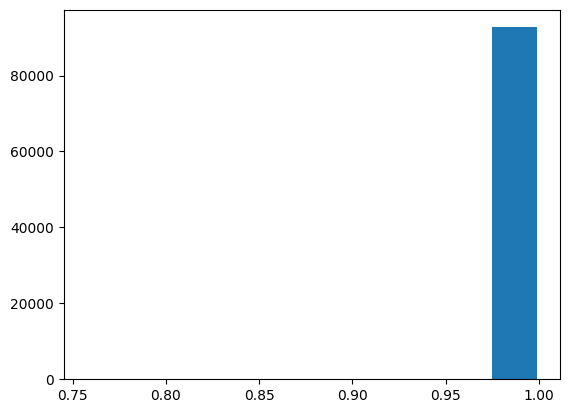

In [219]:
prob_train = cb.predict_proba(Pool(X, cat_features=cat_features))[:,0]
plt.hist(prob_train)

In [220]:
len(prob_train[prob_train<0.98])

93

In [221]:
data = pd.concat([batch_0, X[prob_train<0.98]])
train_x, val_x, train_y, val_y = train_test_split(data[features], data['mark_distribution'], test_size=0.2)


cb = train_catboost(train_x, val_x, train_y, val_y)

print(accuracy_score(val_y, cb.predict(val_x)))

print('=================')

importance_df = pd.DataFrame({'features':cb.feature_names_, 'importances':cb.feature_importances_})
importance_df_all = pd.concat([importance_df_all, importance_df])

Learning rate set to 0.030652
0:	learn: 0.6255342	test: 0.6266774	best: 0.6266774 (0)	total: 3.72ms	remaining: 3.71s
100:	learn: 0.0405013	test: 0.0863323	best: 0.0863041 (98)	total: 317ms	remaining: 2.82s
200:	learn: 0.0216676	test: 0.0817810	best: 0.0813178 (179)	total: 621ms	remaining: 2.47s
300:	learn: 0.0129147	test: 0.0806054	best: 0.0797992 (248)	total: 928ms	remaining: 2.15s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.07979916753
bestIteration = 248

Shrink model to first 249 iterations.
0.9817351598173516


(array([ 2.,  1.,  1.,  0.,  0.,  1.,  2.,  2., 20., 64.]),
 array([0.0091495 , 0.10572616, 0.20230281, 0.29887946, 0.39545612,
        0.49203277, 0.58860943, 0.68518608, 0.78176274, 0.87833939,
        0.97491604]),
 <BarContainer object of 10 artists>)

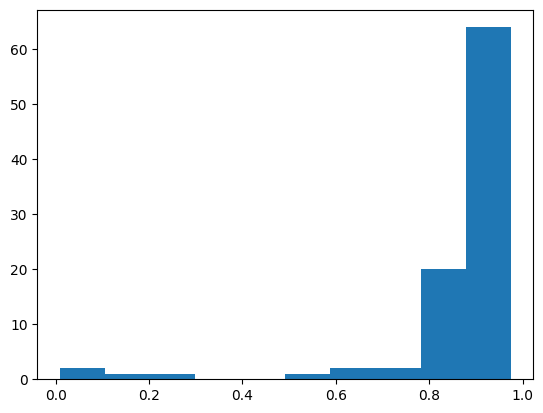

In [222]:
prob_train = cb.predict_proba(Pool(X[prob_train<0.98], cat_features=cat_features))[:,0]
plt.hist(prob_train)

In [229]:
# len(prob_train[prob_train<0.5])/len(prob_train)

# Phase-2 data

In [88]:
from raw_data_processor import RawDataProcessor

In [102]:
raw_df = pd.read_parquet('data/raw_data/phase-2/prob-2/raw_train.parquet')
cate_cols = cat_features

phase2_df = RawDataProcessor.apply_category_features(
    raw_df=raw_df,
    categorical_cols=cate_cols,
    category_index=model.category_index,
    
)


In [103]:
phase2_df = phase2_df[features]
# phase2_df[phase2_df['feature4'] == 'Normal']

In [104]:
phase2_df = Pool(phase2_df, cat_features=cat_features)
phase2_df
phase2_drift = detect_drift_model.predict(phase2_df)
phase2_drift
(phase2_drift==1).sum()

149